In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Load**

In [11]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/dataset1.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/dataset2.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/dataset3.csv')
df_1.head()

,ID,gender,minority,deprived
0,1087360,0,0,0
1,1088938,0,1,0
2,1088953,0,1,0
3,1088961,0,1,0
4,1089147,0,1,0


**Dastaset Merge By Column**

In [4]:
merged_df = df_1.merge(df_2, on='ID', how='inner').merge(df_3, on='ID', how='inner')
merged_df.head()

,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,...,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1087192,0,0,0,2.0,0.5,0.5,0.5,1.0,0.5,...,4,4,4,4,5,4,4,5,4,4
1,1087195,0,0,0,2.0,1.0,0.0,0.0,3.0,1.0,...,3,4,5,3,5,4,4,5,4,4
2,1087205,0,0,0,1.0,0.5,0.0,0.0,0.5,0.5,...,3,3,3,3,4,3,3,3,4,4
3,1087214,0,0,0,2.0,1.0,0.5,0.0,2.0,1.0,...,4,4,4,4,3,5,4,5,4,4
4,1087222,0,0,0,1.0,3.0,0.0,0.0,2.0,1.0,...,2,3,3,4,4,3,5,5,5,5


# Descriptive Statistics

**min,max,mean,mode,median**

In [ ]:
summary_stats = merged_df.agg({
    'C_we': ['min', 'max', 'mean', 'median'],
    'C_wk': ['min', 'max', 'mean', 'median'],
    'G_we': ['min', 'max', 'mean', 'median'],
    'G_wk': ['min', 'max', 'mean', 'median'],
    'S_we': ['min', 'max', 'mean', 'median'],
    'S_wk': ['min', 'max', 'mean', 'median'],
    'T_we': ['min', 'max', 'mean', 'median'],
    'T_wk': ['min', 'max', 'mean', 'median']
})

print(summary_stats)


            C_we      C_wk      G_we      G_wk      S_we      S_wk      T_we  \
min     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
max     7.000000  7.000000  7.000000  7.000000  7.000000  7.000000  7.000000   
mean    2.198483  1.768092  1.726332  0.997828  3.504085  2.889604  3.647439   
median  2.000000  1.000000  0.500000  0.000000  3.000000  2.000000  4.000000   

            T_wk  
min     0.000000  
max     7.000000  
mean    2.551644  
median  2.000000  


**Standard Deviation of Screen Time across demographic groups**


In [19]:
screen_time_stats = merged_df.groupby(['gender', 'deprived', 'minority'])[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].std()

print(screen_time_stats)


                              C_we      C_wk      G_we      G_wk      S_we  \
gender deprived minority                                                     
0      0        0         2.011646  1.672775  1.203499  0.792801  2.358709   
                1         2.095541  1.747351  1.222707  0.796268  2.385748   
       1        0         2.234063  1.908014  1.492018  1.041038  2.428734   
                1         2.166558  1.840636  1.298080  0.877008  2.477313   
1      0        0         1.926988  1.549932  2.203723  1.678786  2.279462   
                1         1.943085  1.626209  2.070533  1.508934  2.327268   
       1        0         2.172858  1.806078  2.354243  1.904277  2.533401   
                1         2.021728  1.684345  2.172283  1.583325  2.419814   

                              S_wk      T_we      T_wk  
gender deprived minority                                
0      0        0         2.255649  1.852488  1.630878  
                1         2.277294  1.894974  1.

**Standard Deviation of well-being scores across demographic groups**




In [17]:
wellbeing_stats = merged_df.groupby(['gender', 'deprived', 'minority'])[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']].std()

print(wellbeing_stats)


                              Optm      Usef      Relx      Intp      Engs  \
gender deprived minority                                                     
0      0        0         0.977129  0.923077  0.955007  0.974474  1.039939   
                1         1.006639  0.956206  0.977681  1.021460  1.049820   
       1        0         1.033323  0.974235  0.993316  1.050997  1.085594   
                1         1.034105  0.982614  1.001181  1.084696  1.068685   
1      0        0         0.951329  0.891703  0.947694  0.950458  1.000273   
                1         0.976057  0.930589  0.986431  1.011409  1.009537   
       1        0         1.007844  0.951919  0.988643  1.020947  1.042950   
                1         1.028806  0.969400  1.013723  1.088604  1.041941   

                            Dealpr    Thcklr    Goodme     Clsep      Conf  \
gender deprived minority                                                     
0      0        0         1.040889  1.018112  1.088187  1.02502

**Barplot for gender vs Screen Time**


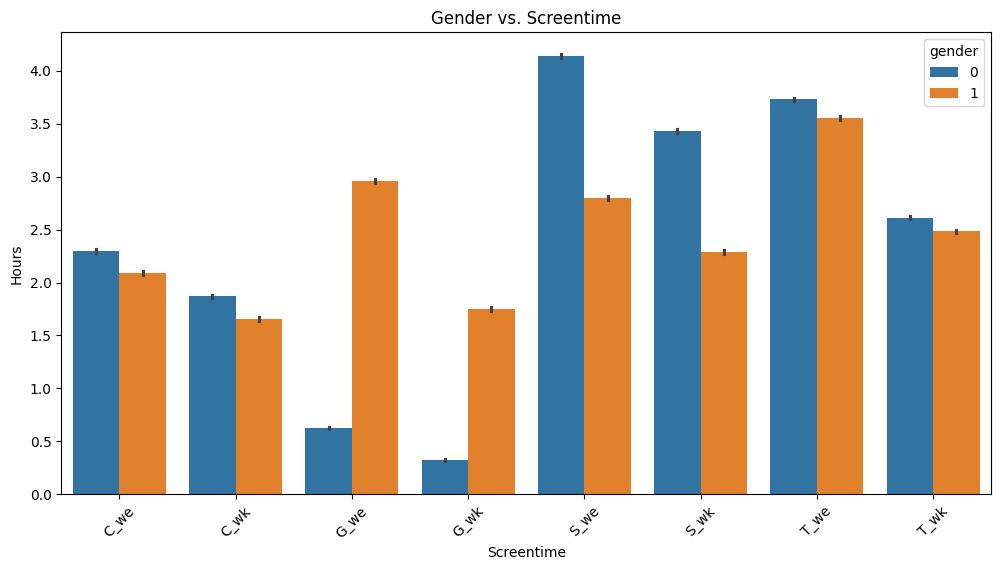

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

melted_df = merged_df.melt(id_vars=['gender'],
                            value_vars=['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk'],
                            var_name='Category',
                            value_name='Value')


plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Value', hue='gender', data=melted_df)
plt.title('Gender vs. Screentime')
plt.xlabel('Screentime')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.show()


**Gender vs Wellbeing**

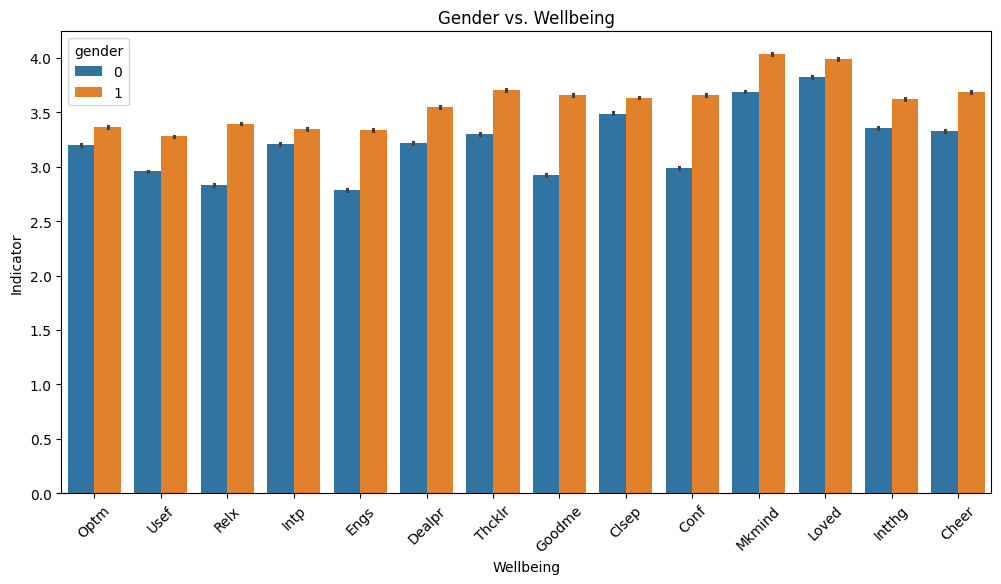

In [ ]:
import matplotlib.pyplot as plt


melted_df = merged_df.melt(id_vars=['gender'],
                            value_vars=['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer'],
                            var_name='Category',
                            value_name='Value')


plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Value', hue='gender', data=melted_df)
plt.title('Gender vs. Wellbeing')
plt.xlabel('Wellbeing')
plt.ylabel('Indicator')
plt.xticks(rotation=45)
plt.show()


**Barplot deprived vs Wellbeing**

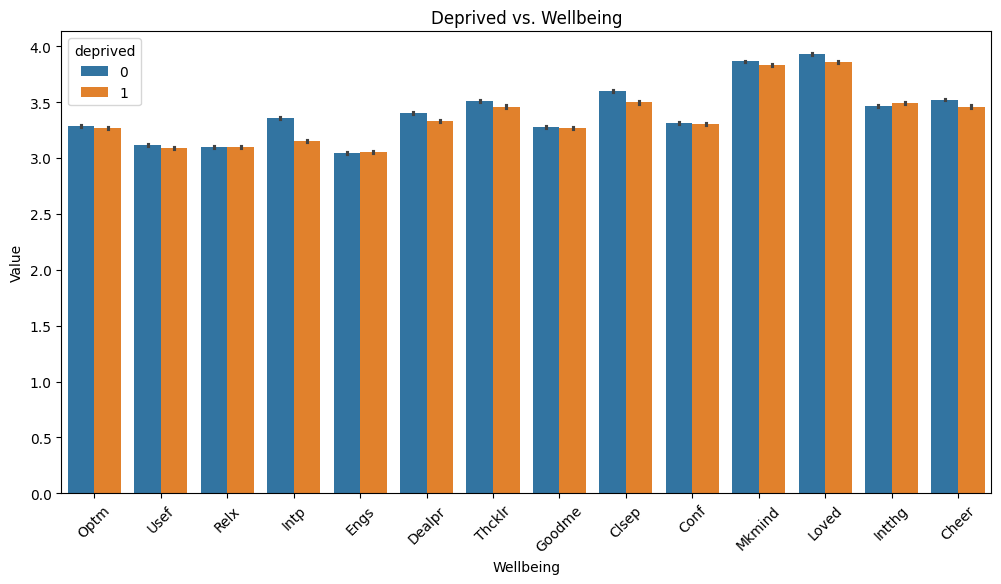

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



melted_df = merged_df.melt(id_vars=['deprived'],
                            value_vars=['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer'],
                            var_name='Category',
                            value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Value', hue='deprived', data=melted_df)
plt.title('Deprived vs. Wellbeing')
plt.xlabel('Wellbeing')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


**Barplot Minority vs Wellbeing**

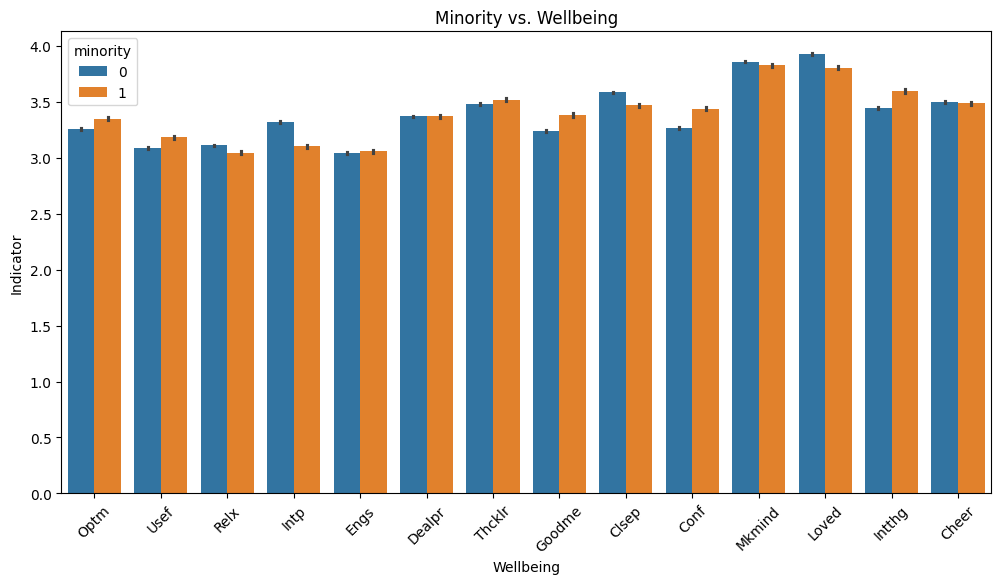

In [ ]:
import matplotlib.pyplot as plt

melted_df = merged_df.melt(id_vars=['minority'],
                            value_vars=['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer'],
                            var_name='Category',
                            value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Value', hue='minority', data=melted_df)
plt.title('Minority vs. Wellbeing')
plt.xlabel('Wellbeing')
plt.ylabel('Indicator')
plt.xticks(rotation=45)
plt.show()


# Inferential Statistics

**Average Well-being VS Screen Time**

<ipython-input-32-308f502ff384>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wellbeing_by_screen_time = merged_df.groupby('screen_time_category')['avg_wellbeing'].mean()
<ipython-input-32-308f502ff384>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_wellbeing_by_screen_time.index, y=avg_wellbeing_by_screen_time.values, palette='coolwarm')


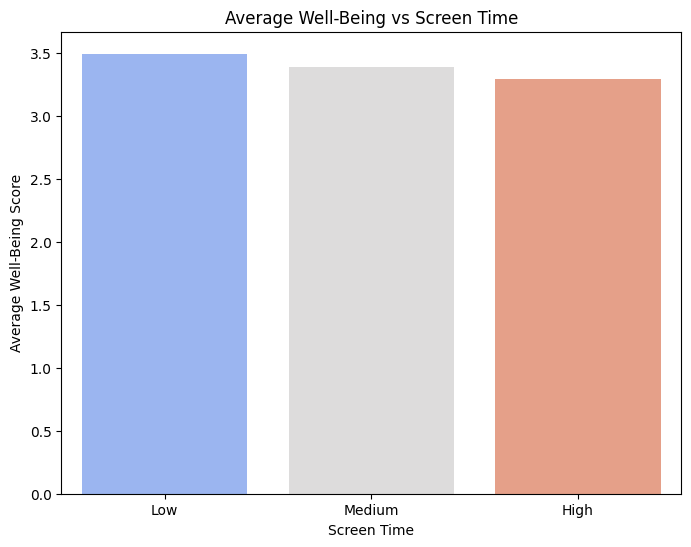

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_df['total_screen_time'] = merged_df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
merged_df['avg_wellbeing'] = merged_df[wellbeing_columns].mean(axis=1)

merged_df['screen_time_category'] = pd.qcut(merged_df['total_screen_time'], 3, labels=['Low', 'Medium', 'High'])

avg_wellbeing_by_screen_time = merged_df.groupby('screen_time_category')['avg_wellbeing'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_wellbeing_by_screen_time.index, y=avg_wellbeing_by_screen_time.values, palette='coolwarm')
plt.title('Average Well-Being vs Screen Time')
plt.xlabel('Screen Time')
plt.ylabel('Average Well-Being Score')
plt.show()



This bar chart shows how average well-being scores change across different screen time categories (Low, Medium, High).

Positive Trend: The average well-being score is higher for the "Low" screen time category and decreases for "Medium" and "High," this suggests that higher screen time is associated with lower well-being.

**T Statistics**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'merged_data' is the DataFrame with the screen time and well-being data

# 1. Calculate total screen time for each respondent
merged_df['total_screen_time'] = merged_df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

# 2. Classify respondents as high or low screen time users
# We'll use the median screen time as a threshold
median_screen_time = merged_df['total_screen_time'].median()
merged_df['screen_time_group'] = np.where(merged_df['total_screen_time'] > median_screen_time, 'High', 'Low')

# 3. Extract well-being scores for the two groups
high_screen_time = merged_df[merged_df['screen_time_group'] == 'High']['avg_wellbeing']
low_screen_time = merged_df[merged_df['screen_time_group'] == 'Low']['avg_wellbeing']

# 4. Perform an independent t-test
t_stat, p_value = stats.ttest_ind(high_screen_time, low_screen_time, equal_var=False)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is significant at the 0.05 level
if p_value < 0.05:
    print("There is a statistically significant difference in well-being scores between high and low screen time users.")
else:
    print("There is no statistically significant difference in well-being scores between high and low screen time users.")


T-statistic: -33.47179179074962
P-value: 3.1124793601977025e-244
There is a statistically significant difference in well-being scores between high and low screen time users.


Here the p-value is less than 0.05, it means there is a statistically significant difference in well-being between high and low screen time users. This suggests that screen time may influence well-being.

**Chi Square Satistics**

In [ ]:
import pandas as pd
merged_df['total_screen_time'] = merged_df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].sum(axis=1)

wellbeing_columns = ['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']
merged_df['avg_wellbeing'] = merged_df[wellbeing_columns].mean(axis=1)

merged_df['screen_time_category'] = pd.cut(merged_df['total_screen_time'], bins=[0, merged_df['total_screen_time'].median(), merged_df['total_screen_time'].max()], labels=['Low', 'High'])
merged_df['wellbeing_category'] = pd.cut(merged_df['avg_wellbeing'], bins=[0, merged_df['avg_wellbeing'].median(), merged_df['avg_wellbeing'].max()], labels=['Low', 'High'])

contingency_table = pd.crosstab(merged_df['screen_time_category'], merged_df['wellbeing_category'])

chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("There is a statistically significant association between screen time and well-being.")
else:
    print("There is no statistically significant association between screen time and well-being.")


Chi-square statistic: 755.0299678945648
P-value: 3.233778678141073e-166
There is a statistically significant association between screen time and well-being.
